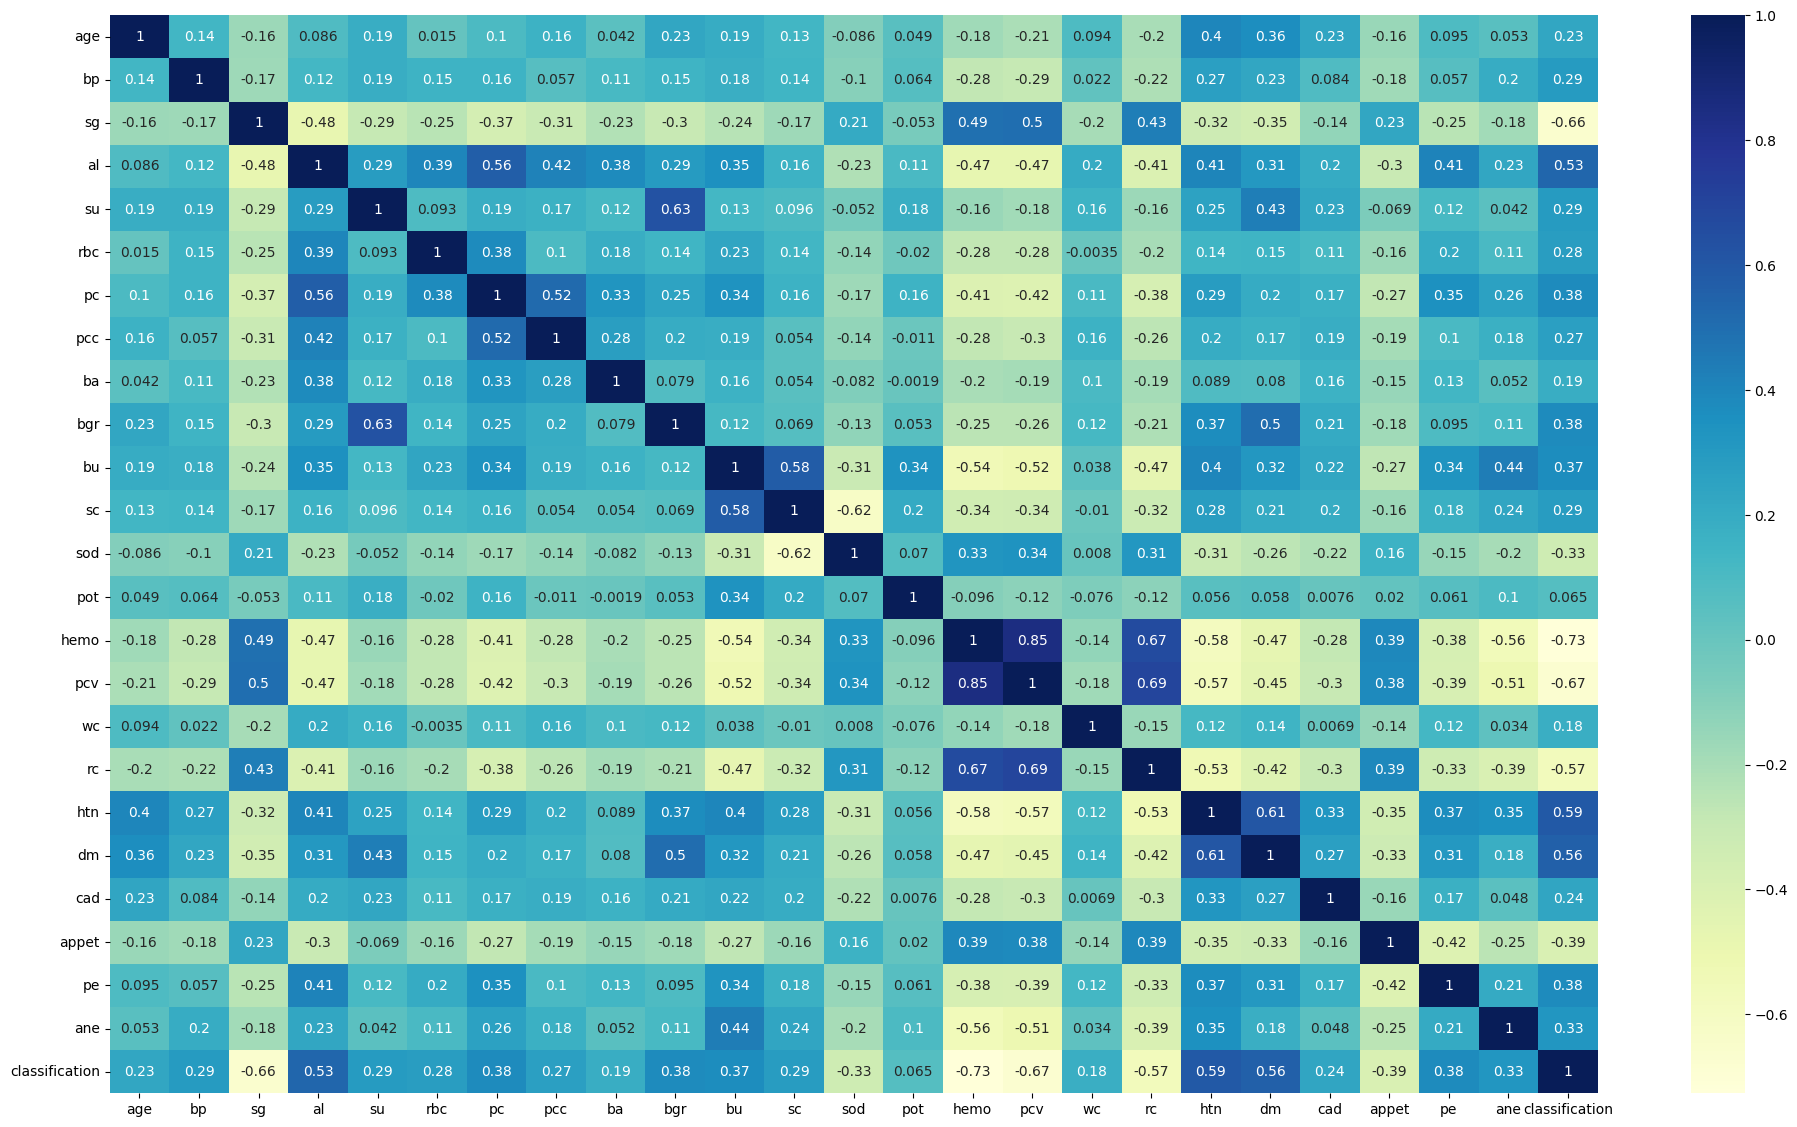

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,138.0,4.4,9.6,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0


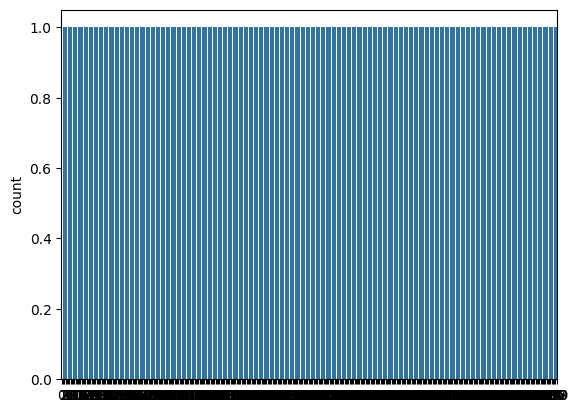

In [42]:
# Importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns', None)
# Reading Dataset:
dataset = pd.read_csv("Kidney_data.csv")
# Top 5 records:
dataset.head()
dataset = dataset.drop('id', axis=1)
dataset.shape
dataset.isnull().sum()
dataset.describe()
dataset.dtypes
dataset.head()
dataset['rbc'].value_counts()
dataset['rbc'] = dataset['rbc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})
dataset['pc'].value_counts()
dataset['pc'] = dataset['pc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})
dataset['pcc'].value_counts()
data=dataset['pcc']
data
dataset['pcc'] = dataset['pcc'].replace(to_replace = {'notpresent':0,'present':1})
dataset['ba'].value_counts()
dataset['ba'] = dataset['ba'].replace(to_replace = {'notpresent':0,'present':1})
data=dataset['ba']
data
dataset['htn'].value_counts()
dataset['htn'] = dataset['htn'].replace(to_replace = {'yes' : 1, 'no' : 0})
data=dataset['htn']
data
dataset['dm'].value_counts()
dataset['dm'] = dataset['dm'].replace(to_replace = {'\tyes':'yes', ' yes':'yes', '\tno':'no'})
dataset['dm'] = dataset['dm'].replace(to_replace = {'yes' : 1, 'no' : 0})
dataset['cad'].value_counts()
dataset['cad'] = dataset['cad'].replace(to_replace = {'\tno':'no'})
dataset['cad'] = dataset['cad'].replace(to_replace = {'yes' : 1, 'no' : 0})
dataset['appet'].unique()
dataset['appet'] = dataset['appet'].replace(to_replace={'good':1,'poor':0,'no':np.nan})
dataset['pe'].value_counts()
dataset['pe'] = dataset['pe'].replace(to_replace = {'yes' : 1, 'no' : 0})
dataset['ane'].value_counts()
dataset['ane'] = dataset['ane'].replace(to_replace = {'yes' : 1, 'no' : 0})
dataset['classification'].value_counts()
dataset['classification'] = dataset['classification'].replace(to_replace={'ckd\t':'ckd'})
dataset["classification"] = [1 if i == "ckd" else 0 for i in dataset["classification"]]
dataset.head()
dataset.dtypes
dataset['pcv'] = pd.to_numeric(dataset['pcv'], errors='coerce')
dataset['wc'] = pd.to_numeric(dataset['wc'], errors='coerce')
dataset['rc'] = pd.to_numeric(dataset['rc'], errors='coerce')
dataset.dtypes
dataset.describe()
dataset.isnull().sum().sort_values(ascending=False)
features = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
           'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
           'appet', 'pe', 'ane']
for feature in features:
    dataset[feature] = dataset[feature].fillna(dataset[feature].median())
dataset.isnull().any().sum()
plt.figure(figsize=(24,14))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()
dataset.drop('pcv', axis=1, inplace=True)
dataset.head()
sns.countplot(dataset['classification'])
# Independent and Dependent Feature:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X.head()


In [84]:
### ADABOOST ###

# Baseline Model (AdaBoost without feature selection or scaling)
ada_baseline = AdaBoostClassifier(random_state=42)
ada_baseline.fit(X_train, y_train)
y_pred_ada_baseline = ada_baseline.predict(X_test)

# Baseline AdaBoost Model Accuracy and Confusion Matrix
ada_baseline_accuracy = accuracy_score(y_test, y_pred_ada_baseline)
print(f"AdaBoost Baseline Model Accuracy: {ada_baseline_accuracy:.2f}")
print("AdaBoost Baseline Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada_baseline))

AdaBoost Baseline Model Accuracy: 1.00
AdaBoost Baseline Confusion Matrix:
 [[44  0]
 [ 0 76]]


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)
y_pred_baseline = rf_baseline.predict(X_test)


In [45]:
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Model Accuracy: {baseline_accuracy:.2f}")
print("Baseline Confusion Matrix:\n", confusion_matrix(y_test, y_pred_baseline))


Baseline Model Accuracy: 1.00
Baseline Confusion Matrix:
 [[44  0]
 [ 0 76]]


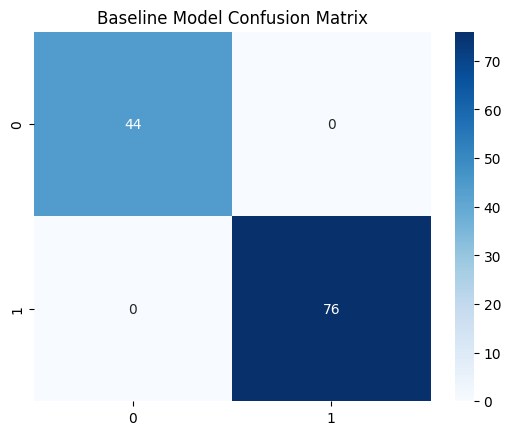

In [46]:
sns.heatmap(confusion_matrix(y_test, y_pred_baseline), annot=True, fmt='d', cmap='Blues')
plt.title('Baseline Model Confusion Matrix')
plt.show()

In [87]:
selected_features = ['sg', 'htn', 'hemo', 'dm', 'al', 'appet', 'rc', 'pc']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_test_scaled = scaler.transform(X_test[selected_features])

In [49]:
# RandomForest Classifier with optimized features and scaling
rf_optimized = RandomForestClassifier(random_state=42)
rf_optimized.fit(X_train_scaled, y_train)
y_pred_optimized = rf_optimized.predict(X_test_scaled)


In [50]:
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Model Accuracy: {optimized_accuracy:.2f}")
print("Optimized Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optimized))


Optimized Model Accuracy: 1.00
Optimized Confusion Matrix:
 [[44  0]
 [ 0 76]]


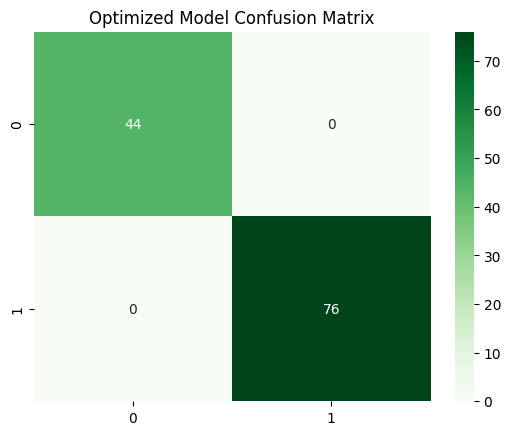

In [51]:
sns.heatmap(confusion_matrix(y_test, y_pred_optimized), annot=True, fmt='d', cmap='Greens')
plt.title('Optimized Model Confusion Matrix')
plt.show()

/var/folders/6j/ctsgnxrx4r7ft9b56b774tfm0000gn/T/ipykernel_7745/432151065.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


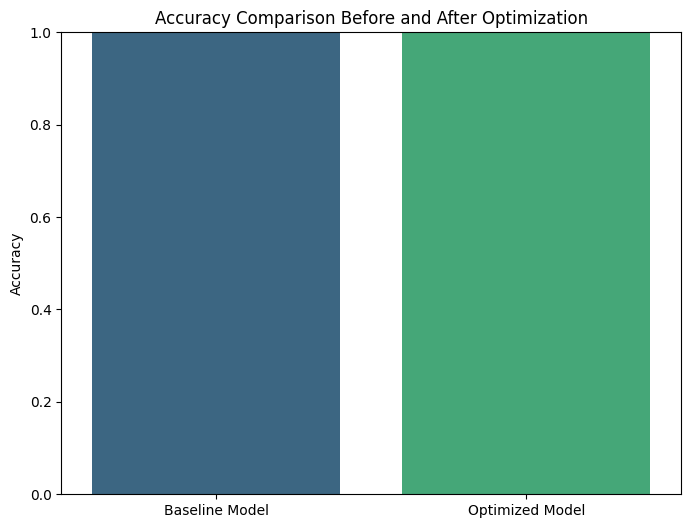

In [52]:
plt.figure(figsize=(8,6))
models = ['Baseline Model', 'Optimized Model']
accuracies = [baseline_accuracy, optimized_accuracy]
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.title('Accuracy Comparison Before and After Optimization')
plt.ylabel('Accuracy')
plt.show()

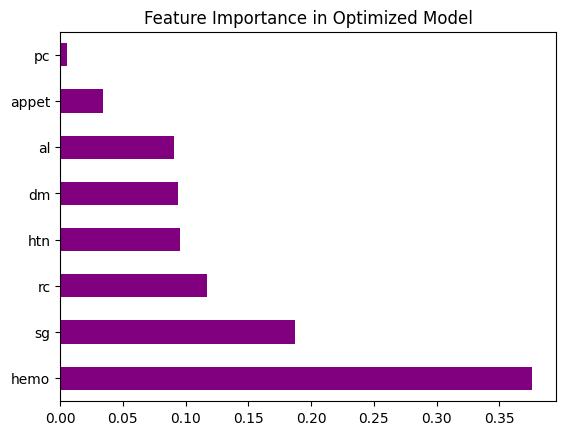

In [53]:
importances = pd.Series(rf_optimized.feature_importances_, index=selected_features)
importances.nlargest(8).plot(kind='barh', color='purple')
plt.title('Feature Importance in Optimized Model')
plt.show()

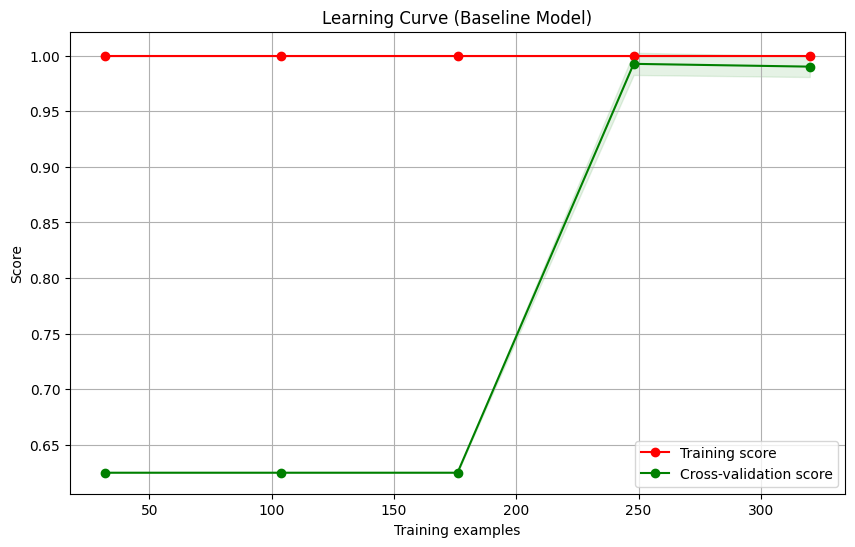

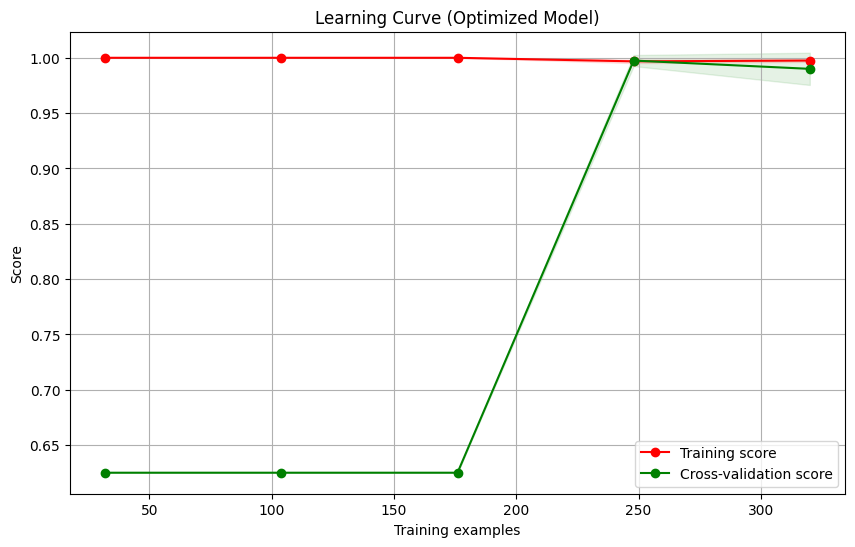

In [54]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    return plt

# Plot Learning Curves for Baseline and Optimized Models
plot_learning_curve(rf_baseline, "Learning Curve (Baseline Model)", X, y, cv=5)
plt.show()

plot_learning_curve(rf_optimized, "Learning Curve (Optimized Model)", X[selected_features], y, cv=5)
plt.show()


In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### GRADIENT BOOSTING CLASSIFIER ###

# Baseline Model (Gradient Boosting without feature selection or scaling)
gb_baseline = GradientBoostingClassifier(random_state=42)
gb_baseline.fit(X_train, y_train)
y_pred_gb_baseline = gb_baseline.predict(X_test)

# Baseline Gradient Boosting Model Accuracy and Confusion Matrix
gb_baseline_accuracy = accuracy_score(y_test, y_pred_gb_baseline)
print(f"Gradient Boosting Baseline Model Accuracy: {gb_baseline_accuracy:.2f}")
print("Gradient Boosting Baseline Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb_baseline))

Gradient Boosting Baseline Model Accuracy: 1.00
Gradient Boosting Baseline Confusion Matrix:
 [[44  0]
 [ 0 76]]


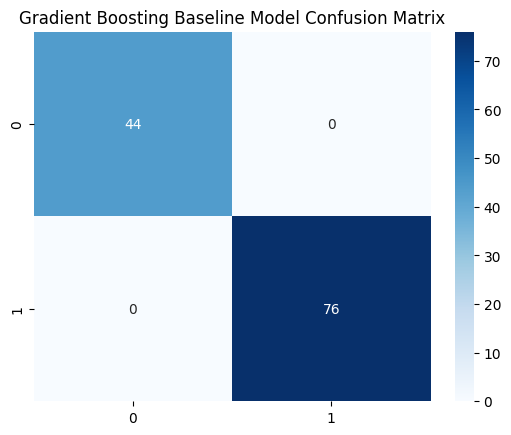

In [56]:
# Plot Confusion Matrix for Baseline Gradient Boosting Model
sns.heatmap(confusion_matrix(y_test, y_pred_gb_baseline), annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Baseline Model Confusion Matrix')
plt.show()





In [57]:
# Optimized Model (Gradient Boosting with selected features and scaling)
gb_optimized = GradientBoostingClassifier(random_state=42)
gb_optimized.fit(X_train_scaled, y_train)
y_pred_gb_optimized = gb_optimized.predict(X_test_scaled)



Gradient Boosting Optimized Model Accuracy: 1.00
Gradient Boosting Optimized Confusion Matrix:
 [[44  0]
 [ 0 76]]


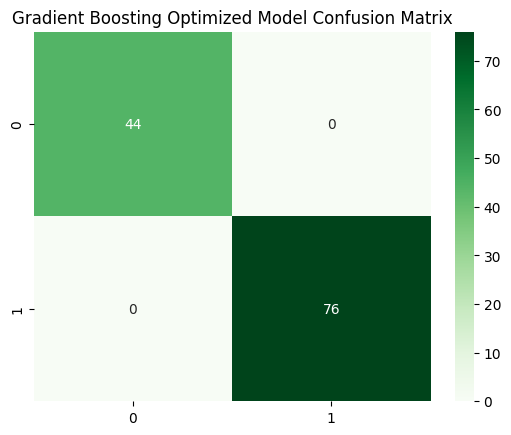

In [58]:
# Optimized Gradient Boosting Model Accuracy and Confusion Matrix
gb_optimized_accuracy = accuracy_score(y_test, y_pred_gb_optimized)
print(f"Gradient Boosting Optimized Model Accuracy: {gb_optimized_accuracy:.2f}")
print("Gradient Boosting Optimized Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb_optimized))

# Plot Confusion Matrix for Optimized Gradient Boosting Model
sns.heatmap(confusion_matrix(y_test, y_pred_gb_optimized), annot=True, fmt='d', cmap='Greens')
plt.title('Gradient Boosting Optimized Model Confusion Matrix')
plt.show()

In [85]:
# Baseline Model (SVM without feature selection or scaling)
svm_baseline = SVC(random_state=42)
svm_baseline.fit(X_train, y_train)
y_pred_svm_baseline = svm_baseline.predict(X_test)

# Baseline SVM Model Accuracy and Confusion Matrix
svm_baseline_accuracy = accuracy_score(y_test, y_pred_svm_baseline)
print(f"SVM Baseline Model Accuracy: {svm_baseline_accuracy:.2f}")
print("SVM Baseline Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_baseline))

SVM Baseline Model Accuracy: 0.63
SVM Baseline Confusion Matrix:
 [[ 0 44]
 [ 0 76]]


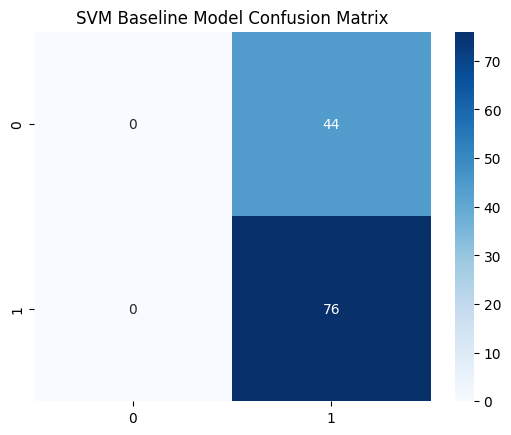

In [60]:
# Plot Confusion Matrix for Baseline SVM Model
sns.heatmap(confusion_matrix(y_test, y_pred_svm_baseline), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Baseline Model Confusion Matrix')
plt.show()

In [86]:
svm_optimized = SVC(random_state=42)
svm_optimized.fit(X_train_scaled, y_train)
y_pred_svm_optimized = svm_optimized.predict(X_test_scaled)

# Optimized SVM Model Accuracy and Confusion Matrix
svm_optimized_accuracy = accuracy_score(y_test, y_pred_svm_optimized)
print(f"SVM Optimized Model Accuracy: {svm_optimized_accuracy:.2f}")
print("SVM Optimized Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_optimized))

SVM Optimized Model Accuracy: 0.99
SVM Optimized Confusion Matrix:
 [[44  0]
 [ 1 75]]


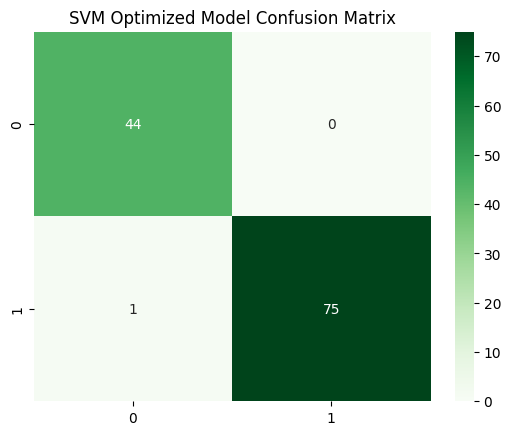

In [71]:
# Plot Confusion Matrix for Optimized SVM Model
sns.heatmap(confusion_matrix(y_test, y_pred_svm_optimized), annot=True, fmt='d', cmap='Greens')
plt.title('SVM Optimized Model Confusion Matrix')
plt.show()

/var/folders/6j/ctsgnxrx4r7ft9b56b774tfm0000gn/T/ipykernel_7745/3832375938.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=svm_models, y=svm_accuracies, palette='viridis')


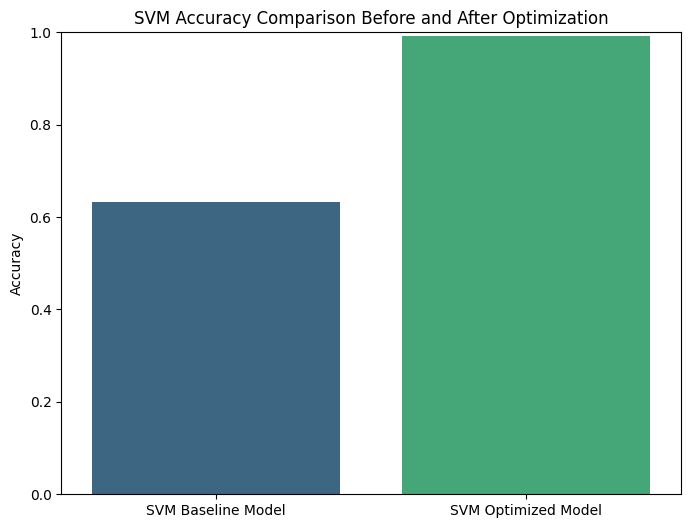

In [77]:
# SVM Accuracy Comparison (Baseline vs Optimized)
plt.figure(figsize=(8,6))
svm_models = ['SVM Baseline Model', 'SVM Optimized Model']
svm_accuracies = [svm_baseline_accuracy, svm_optimized_accuracy]
sns.barplot(x=svm_models, y=svm_accuracies, palette='viridis')
plt.ylim(0, 1)
plt.title('SVM Accuracy Comparison Before and After Optimization')
plt.ylabel('Accuracy')
plt.show()


In [72]:
### K-NEAREST NEIGHBORS (KNN) ###

# Baseline Model (KNN without feature selection or scaling)
knn_baseline = KNeighborsClassifier()
knn_baseline.fit(X_train, y_train)
y_pred_knn_baseline = knn_baseline.predict(X_test)

# Baseline KNN Model Accuracy and Confusion Matrix
knn_baseline_accuracy = accuracy_score(y_test, y_pred_knn_baseline)
print(f"KNN Baseline Model Accuracy: {knn_baseline_accuracy:.2f}")
print("KNN Baseline Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_baseline))

KNN Baseline Model Accuracy: 0.71
KNN Baseline Confusion Matrix:
 [[37  7]
 [28 48]]


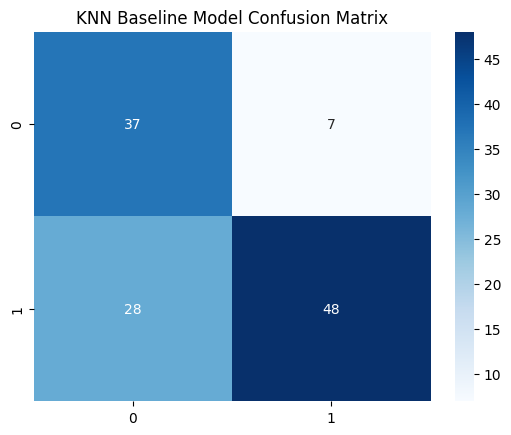

In [73]:
# Plot Confusion Matrix for Baseline KNN Model
sns.heatmap(confusion_matrix(y_test, y_pred_knn_baseline), annot=True, fmt='d', cmap='Blues')
plt.title('KNN Baseline Model Confusion Matrix')
plt.show()

In [74]:
# Optimized Model (KNN with selected features and scaling)
knn_optimized = KNeighborsClassifier()
knn_optimized.fit(X_train_scaled, y_train)
y_pred_knn_optimized = knn_optimized.predict(X_test_scaled)

# Optimized KNN Model Accuracy and Confusion Matrix
knn_optimized_accuracy = accuracy_score(y_test, y_pred_knn_optimized)
print(f"KNN Optimized Model Accuracy: {knn_optimized_accuracy:.2f}")
print("KNN Optimized Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_optimized))

KNN Optimized Model Accuracy: 1.00
KNN Optimized Confusion Matrix:
 [[44  0]
 [ 0 76]]


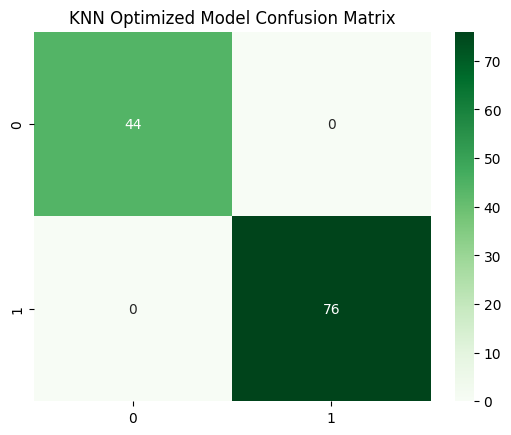

In [75]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn_optimized), annot=True, fmt='d', cmap='Greens')
plt.title('KNN Optimized Model Confusion Matrix')
plt.show()

/var/folders/6j/ctsgnxrx4r7ft9b56b774tfm0000gn/T/ipykernel_7745/853667339.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=knn_models, y=knn_accuracies, palette='viridis')


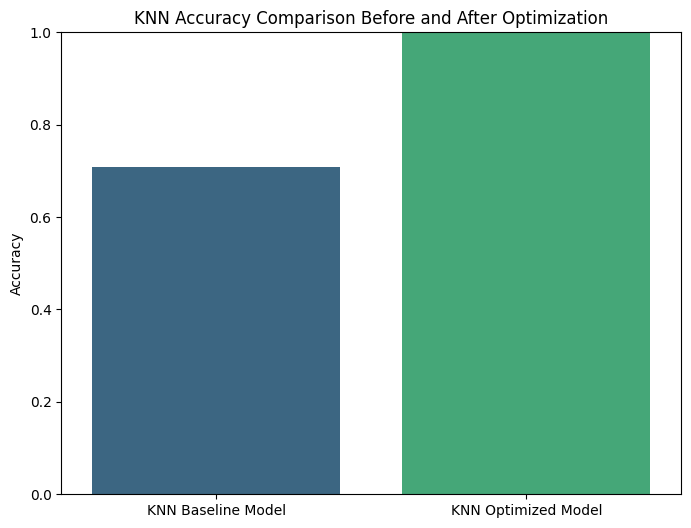

In [78]:
# KNN Accuracy Comparison (Baseline vs Optimized)
plt.figure(figsize=(8,6))
knn_models = ['KNN Baseline Model', 'KNN Optimized Model']
knn_accuracies = [knn_baseline_accuracy, knn_optimized_accuracy]
sns.barplot(x=knn_models, y=knn_accuracies, palette='viridis')
plt.ylim(0, 1)
plt.title('KNN Accuracy Comparison Before and After Optimization')
plt.ylabel('Accuracy')
plt.show()


/var/folders/6j/ctsgnxrx4r7ft9b56b774tfm0000gn/T/ipykernel_7745/721030787.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='Set2')


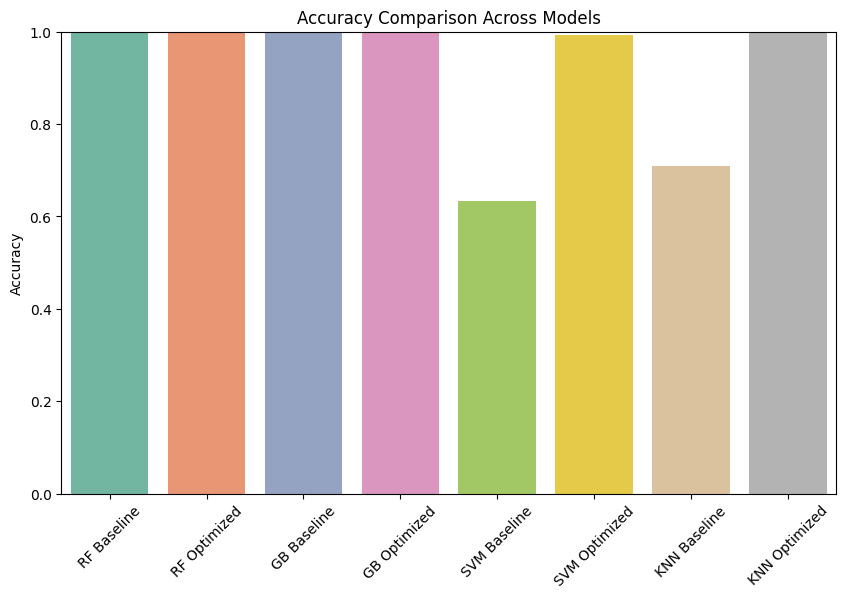

In [76]:
### COMPARISON OF PERFORMANCE ACROSS MODELS ###
# Bar plot to compare accuracy of different models
plt.figure(figsize=(10,6))
models = ['RF Baseline', 'RF Optimized', 'GB Baseline', 'GB Optimized', 'SVM Baseline', 'SVM Optimized', 'KNN Baseline', 'KNN Optimized']
accuracies = [baseline_accuracy, optimized_accuracy, gb_baseline_accuracy, gb_optimized_accuracy, svm_baseline_accuracy, svm_optimized_accuracy, knn_baseline_accuracy, knn_optimized_accuracy]
sns.barplot(x=models, y=accuracies, palette='Set2')
plt.ylim(0, 1)
plt.title('Accuracy Comparison Across Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


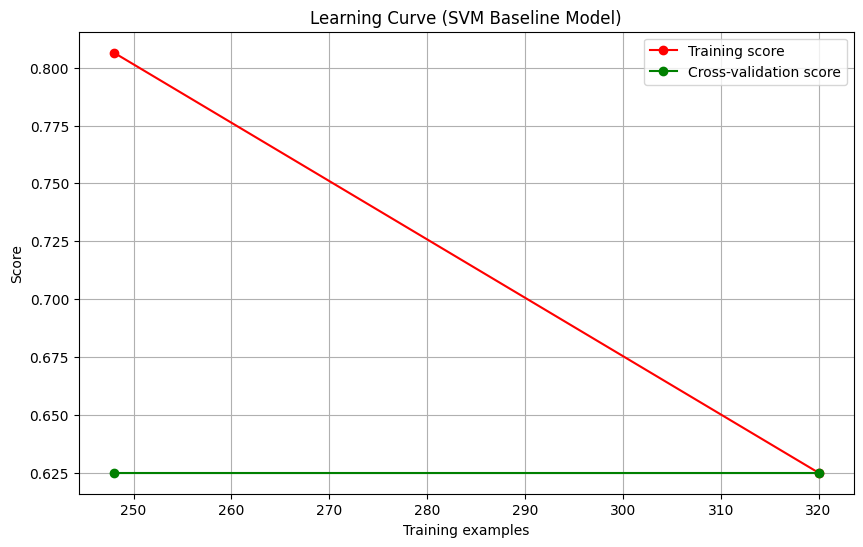

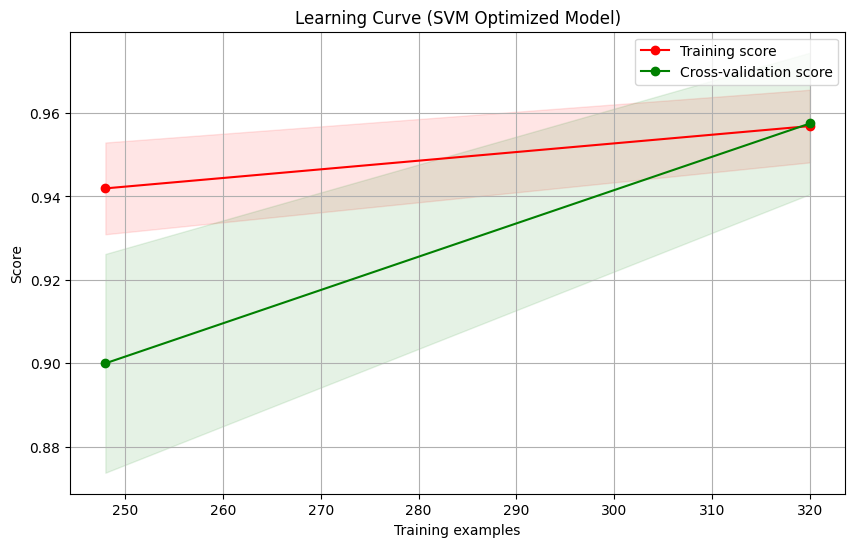

In [79]:
from sklearn.svm import SVC

# Initialize the SVM models (baseline and optimized)
svm_baseline = SVC(random_state=42)
svm_optimized = SVC(kernel='rbf', random_state=42)  # Example of optimized with RBF kernel

# Plot Learning Curves for SVM Baseline Model
plot_learning_curve(svm_baseline, "Learning Curve (SVM Baseline Model)", X, y, cv=5)
plt.show()

# Plot Learning Curves for SVM Optimized Model (with selected features)
plot_learning_curve(svm_optimized, "Learning Curve (SVM Optimized Model)", X[selected_features], y, cv=5)
plt.show()


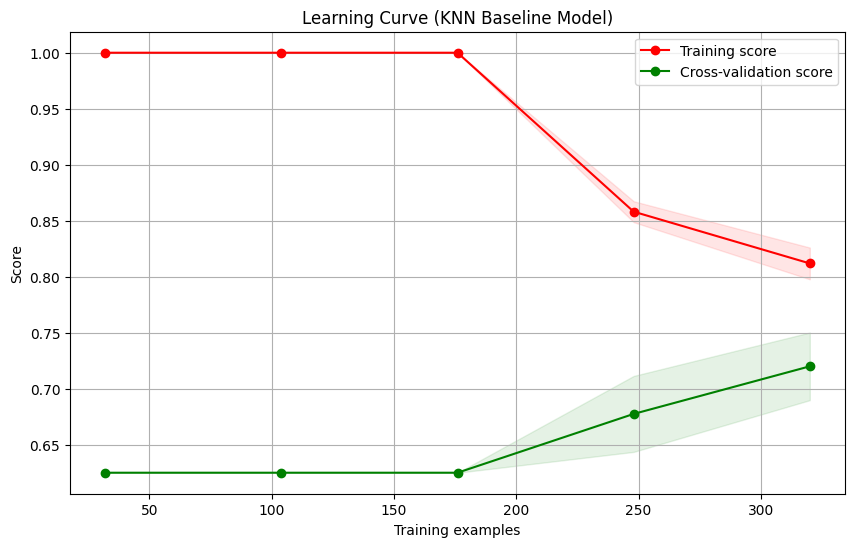

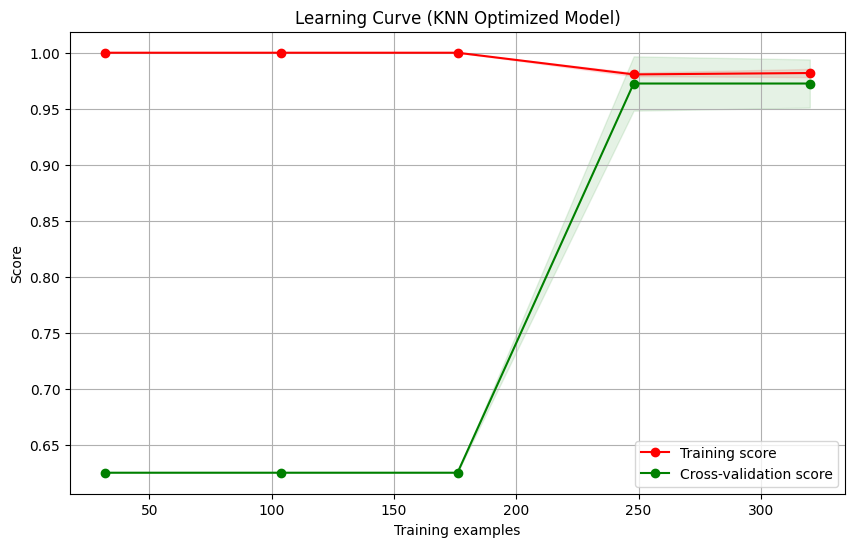

In [80]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN models (baseline and optimized)
knn_baseline = KNeighborsClassifier(n_neighbors=5)
knn_optimized = KNeighborsClassifier(n_neighbors=3)  # Example of optimized with different neighbors

# Plot Learning Curves for KNN Baseline Model
plot_learning_curve(knn_baseline, "Learning Curve (KNN Baseline Model)", X, y, cv=5)
plt.show()

# Plot Learning Curves for KNN Optimized Model (with selected features)
plot_learning_curve(knn_optimized, "Learning Curve (KNN Optimized Model)", X[selected_features], y, cv=5)
plt.show()


Random Forest Baseline Accuracy: 1.00
Random Forest Optimized Accuracy: 1.00


In [82]:
### ADABOOST
# Baseline AdaBoost with low learning rate and no scaling
ada_baseline = AdaBoostClassifier(n_estimators=50, learning_rate=0.5, random_state=42)  # Lower learning rate
ada_baseline.fit(X_train, y_train)
y_pred_ada_baseline = ada_baseline.predict(X_test)

# Optimized AdaBoost with scaling and higher learning rate
ada_optimized = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)  # Higher learning rate
ada_optimized.fit(X_train_scaled, y_train)
y_pred_ada_optimized = ada_optimized.predict(X_test_scaled)

# Accuracy comparison
ada_baseline_accuracy = accuracy_score(y_test, y_pred_ada_baseline)
ada_optimized_accuracy = accuracy_score(y_test, y_pred_ada_optimized)
print(f"AdaBoost Baseline Accuracy: {ada_baseline_accuracy:.2f}")
print(f"AdaBoost Optimized Accuracy: {ada_optimized_accuracy:.2f}")

AdaBoost Baseline Accuracy: 1.00
AdaBoost Optimized Accuracy: 1.00
